### Load an UGRID

In [1]:
from gridgeo import GridGeo

url = ("http://crow.marine.usf.edu:8080/thredds/dodsC/"
       "FVCOM-Nowcast-Agg.nc")

# Showing the whole grid is quite expensive.
# I'll use a smaller version for now.
url = ("../gridgeo/tests/data/FVCOM-Nowcast-Agg.nc")

ugrid = GridGeo(url)

### Does it load with SGRID as well?

In [2]:
url = ("http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/"
       "Projects/Sandy/triple_nest/00_dir_NYB05.ncml")

url = "../gridgeo/tests/data/00_dir_NYB05.nc"

sgrid = GridGeo(url)

NotImplementedError: 

### The grid object no, but the grid loader is ready.

In [3]:
from gridgeo import load_grid

sgrid = load_grid(url)
sgrid

### The grid object has the same `__repr__` as shapely

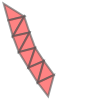

In [4]:
ugrid

### The properties are:

In [5]:
ugrid.grid  # The `py{u,s}grid` object.

In [6]:
ugrid.mesh_name  # Grid name

u'fvcom_mesh'

In [7]:
ugrid.nc  # Reference to the netCDF file/URL path or object.

'../gridgeo/tests/data/FVCOM-Nowcast-Agg.nc'

In [8]:
type(ugrid.polygons)  # The polygons

shapely.geometry.multipolygon.MultiPolygon

### The methods are:

In [9]:
properties = dict(fill='#fd7d11',
                  fill_opacity=0.2,
                  stroke_opacity=1,
                  popupContent=ugrid.mesh_name)

geojson = ugrid.grid2geojson(**properties)

type(geojson)

dict

In [10]:
shape = ugrid.grid2shapely()

type(shape)

shapely.geometry.multipolygon.MultiPolygon

### There will be a CLI utility to save the files

In [11]:
import json

kw = dict( sort_keys=True, indent=4, separators=(',', ': '))
with open('ugrid.geojson','w') as f:
    json.dump(geojson, f, **kw)

### At the moment folium ignores all GeoJSON properties but the popupContent...

In [12]:
import folium

# Using shape`ly trick to center the map.
lon, lat = shape.centroid.x, shape.centroid.y
zoom_start = 11

mapa = folium.Map(location=[lat, lon], tiles="OpenStreetMap",
                  zoom_start=zoom_start)

kw = dict(fill_color='#ffffff', line_color='#848482', fill_opacity=0)
mapa.geo_json(geo_str=json.dumps(geojson), **kw)

mapa

### ... but other software do read them!

![](./terria.png)
![](./geojsonio.png)